In [1]:
# Who did you collaborate with on this assignment? 
# if no one, collaborators should contain an empty string,
# else list your collaborators below

# collaborators = [""]
# YOUR CODE HERE
collaborators = ["cc"]
# raise NotImplementedError()


In [2]:
try:
    collaborators
except:
    raise AssertionError("you did not list your collaborators, if any")   


In [3]:
# YOU CAN MOST LIKELY IGNORE THIS CELL. This is only of use for running this notebook locally.

# THIS CELL DOES NOT NEED TO BE RUN ON DATABRICKS. 
# Note that Databricks already creates a SparkContext for you, so this cell can be skipped.
# import findspark
# findspark.init()
# import pyspark
# from pyspark.sql import SQLContext
# sc = pyspark.SparkContext(appName="hw")
# sqlContext = SQLContext(sc)

# print("spark context started")

In [4]:
wordsList = ['cat', 'elephant', 'rat', 'rat', 'cat']
wordsRDD = sc.parallelize(wordsList, 4)
# Print out the type of wordsRDD
print(type(wordsRDD))

<class 'pyspark.rdd.RDD'>

In [5]:
# One way of completing the function
def makePlural(word):
    # TODO: Uncomment the line below and replace <FILL IN> with appropriate code
    # return <FILL IN>

    # YOUR CODE HERE
    return word + "s"
#     raise NotImplementedError()

print(makePlural('cat'))

cats

In [6]:
# Load in the testing code and check to see if your answer is correct
# If incorrect it will report back '1 test failed' for each failed test
# Make sure to rerun any cell you change before trying the test again
!pip install nose
from nose.tools import assert_equal, assert_true

"""Check that makePlural function makes its input plural by adding an s"""
assert_equal(makePlural('rat'), 'rats')


In [7]:
# TODO: Uncomment the 2 lines below and replace <FILL IN> with appropriate code
# pluralRDD = wordsRDD.map(<FILL IN>)
# print pluralRDD.collect()

# YOUR CODE HERE
pluralRDD = wordsRDD.map(lambda x: makePlural(x))
print(pluralRDD.collect())
# raise NotImplementedError()

['cats', 'elephants', 'rats', 'rats', 'cats']

In [8]:
"""Check that makePlural was applied to base RDD and call to collect returns correct output"""
assert_equal(pluralRDD.collect(), ['cats', 'elephants', 'rats', 'rats', 'cats'])

In [9]:
# TODO: Uncomment the 2 lines below and replace <FILL IN> with appropriate code
# pluralLambdaRDD = wordsRDD.map(lambda <FILL IN>)
# print pluralLambdaRDD.collect()

# YOUR CODE HERE
pluralLambdaRDD = wordsRDD.map(lambda word: word + "s")
print(pluralLambdaRDD.collect())

# raise NotImplementedError()

['cats', 'elephants', 'rats', 'rats', 'cats']

In [10]:
"""Check that lambda function applied to base RDD and call to collect returns correct output"""
assert_equal(pluralLambdaRDD.collect(), ['cats', 'elephants', 'rats', 'rats', 'cats'])


In [11]:
# TODO: Uncomment the 4 lines below and replace <FILL IN> with appropriate code
# pluralLengths = (pluralRDD
#                  <FILL IN>
#                  .collect())
# print pluralLengths

# YOUR CODE HERE
pluralLengths = pluralRDD.map(lambda w: len(w)).collect()
print(pluralLengths)
# raise NotImplementedError()

[4, 9, 4, 4, 4]

In [12]:
"""Check that pluralLengths correctly computes the length of each word"""
assert_equal(pluralLengths, [4, 9, 4, 4, 4])

In [13]:
# TODO: Uncomment the 2 lines below and replace <FILL IN> with appropriate code
# wordPairs = wordsRDD.<FILL IN>
# print wordPairs.collect()

# YOUR CODE HERE
wordPairs = wordsRDD.map(lambda word: (word, 1))
print(wordPairs.collect())
# raise NotImplementedError()

[('cat', 1), ('elephant', 1), ('rat', 1), ('rat', 1), ('cat', 1)]

In [14]:
"""Check that wordPair contains pair RDDs containing (word, 1) pairs for a given input"""
assert_equal(wordPairs.collect(),
                  [('cat', 1), ('elephant', 1), ('rat', 1), ('rat', 1), ('cat', 1)])

In [15]:
# TODO: Uncomment the 3 lines below and replace <FILL IN> with appropriate code
# Note that groupByKey requires no parameters
# wordsGrouped = wordPairs.<FILL IN>
# for key, value in wordsGrouped.collect():
#     print '{0}: {1}'.format(key, list(value))
# def concate(x):
  
wordsGrouped = wordPairs.groupByKey()
for key, value in wordsGrouped.collect():
    print '{0}: {1}'.format(key, value)
    
# print(sorted(wordsGrouped.mapValues(lambda x: list(x)).collect()))
# YOUR CODE HERE
# def concat(wordPairs):
#   res = []
  
# wordsGrouped = wordPairs.

# raise NotImplementedError()

rat: <pyspark.resultiterable.ResultIterable object at 0x7febcfb6c990>
elephant: <pyspark.resultiterable.ResultIterable object at 0x7febcfb5dc50>
cat: <pyspark.resultiterable.ResultIterable object at 0x7febcfb5db50>

In [16]:
"""Check that wordsGrouped contains words grouped with their counts for a given input"""
assert_equal(sorted(wordsGrouped.mapValues(lambda x: list(x)).collect()),
                  [('cat', [1, 1]), ('elephant', [1]), ('rat', [1, 1])])

In [17]:
# TODO: Uncomment the 2 lines below and replace <FILL IN> with appropriate code
# wordCountsGrouped = wordsGrouped.<FILL IN>
# print wordCountsGrouped.collect()

# YOUR CODE HERE
wordCountsGrouped = wordsGrouped.mapValues(lambda x: sum(x))
print wordCountsGrouped.collect()

# raise NotImplementedError()

[('rat', 2), ('elephant', 1), ('cat', 2)]

In [18]:
"""Check that the sums of the groups are correct"""
assert_equal(sorted(wordCountsGrouped.collect()),
                  [('cat', 2), ('elephant', 1), ('rat', 2)])

In [19]:
# TODO: Uncomment the 2 lines below and replace <FILL IN> with appropriate code
# Note that reduceByKey takes in a function that accepts two values and returns a single value
# wordCounts = wordPairs.reduceByKey(<FILL IN>)
# print wordCounts.collect()

# YOUR CODE HERE
from operator import add
wordCounts = wordPairs.reduceByKey(add)
print(wordCounts.collect())
# raise NotImplementedError()

[('rat', 2), ('elephant', 1), ('cat', 2)]

In [20]:
"""Check that use of reduceByKey for computing word count returns the correct values for a given input"""
assert_equal(sorted(wordCounts.collect()), [('cat', 2), ('elephant', 1), ('rat', 2)])

In [21]:
# TODO: Uncomment the 4 lines below and replace <FILL IN> with appropriate code
# wordCountsCollected = (wordsRDD
#                        <FILL IN>
#                        .collect())
# print wordCountsCollected


# YOUR CODE HERE
from operator import add
wordCountsCollected = wordsRDD.map(lambda x: (x, 1)).reduceByKey(add).collect()
print wordCountsCollected
# raise NotImplementedError()

[('rat', 2), ('elephant', 1), ('cat', 2)]

In [22]:
"""Check that wordCountsCollected contains the correct (word, count) values"""
assert_equal(sorted(wordCountsCollected), [('cat', 2), ('elephant', 1), ('rat', 2)])


In [23]:
# TODO: Uncomment the 2 lines below and replace <FILL IN> with appropriate code
# uniqueWords = <FILL IN>
# print uniqueWords

# YOUR CODE HERE
uniqueWords = wordCounts.count()
print uniqueWords
# raise NotImplementedError()

3

In [24]:
"""Check that uniqueWords equals the number of unique words in the given input"""
assert_equal(uniqueWords, 3)

In [25]:
# TODO: Uncomment the 7 lines below and replace <FILL IN> with appropriate code
# from operator import add
# totalCount = (wordCounts
#               .map(<FILL IN>)
#               .reduce(<FILL IN>))
# average = totalCount / float(<FILL IN>)
# print totalCount
# print round(average, 2)

# YOUR CODE HERE
from operator import add
totalCount = (wordCounts
              .map(lambda x: x[1])
              .reduce(add))
print wordCounts.map(lambda x: x[1]).collect()
average = totalCount / float(wordCounts.count())
print totalCount
print round(average, 2)

# raise NotImplementedError()

[2, 1, 2]
5
1.67

In [26]:
"""Check that totalCount contains the correct value"""
assert_equal(totalCount, 5)

"""Check that value contains the correct value"""
assert_equal(round(average, 2), 1.67)

In [27]:
def wordCount(wordListRDD):
    """Creates a pair RDD with word counts from an RDD of words.

    Args:
        wordListRDD (RDD of str): An RDD consisting of words.

    Returns:
        RDD of (str, int): An RDD consisting of (word, count) tuples.
    """
    # # TODO: Uncomment the line below and Replace <FILL IN> with appropriate code
    # return wordListRDD.<FILL IN>
    
    # YOUR CODE HERE
    return wordListRDD.map(lambda x: (x, 1)).reduceByKey(add)
#     raise NotImplementedError()
    
print(wordCount(wordsRDD).collect())

[('rat', 2), ('elephant', 1), ('cat', 2)]

In [28]:
"""Check that wordCount returns the correct output for a given input"""
assert_equal(sorted(wordCount(wordsRDD).collect()),
                  [('cat', 2), ('elephant', 1), ('rat', 2)])


In [29]:
import re
def removePunctuation(text):
    """Removes punctuation, changes to lower case, and strips leading and trailing spaces.

    Note:
        Only spaces, letters, and numbers should be retained.  Other characters should should be
        eliminated (e.g. it's becomes its).  Leading and trailing spaces should be removed after
        punctuation is removed.

    Args:
        text (str): A string.

    Returns:
        str: The cleaned up string.
    """
    # # TODO: Uncomment the lines below and Replace <FILL IN> with appropriate code
    # <FILL IN>
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text).strip()
    return text
    # YOUR CODE HERE
#     raise NotImplementedError()

print(removePunctuation('Hi, you!'))
print(removePunctuation(' No under_score!'))
print(removePunctuation(' *      Remove punctuation then spaces  * '))

hi you
no under_score
remove punctuation then spaces

In [30]:
"""Check that remotePunctuation removes capitalization and punctuation"""
assert_equal(removePunctuation(" The Elephant's 4 cats. "),
                  'the elephants 4 cats')


In [31]:
# Just run this code

url = "https://raw.githubusercontent.com/10605/data/master/hw1/shakespeare.txt"

from pyspark import SparkFiles
sc.addFile(url)

shakespeareRDD = sc.textFile("file://" + SparkFiles.get("shakespeare.txt"), 8).map(removePunctuation)

print('\n'.join(shakespeareRDD
                .zipWithIndex()  # to (line, lineNum)
                .map(lambda kv: '{0}: {1}'.format(kv[1], kv[0]))  # to 'lineNum: line'
                .take(15)))

0: 1609
1: 
2: the sonnets
3: 
4: by william shakespeare
5: 
6: 
7: 
8: 1
9: from fairest creatures we desire increase
10: that thereby beautys rose might never die
11: but as the riper should by time decease
12: his tender heir might bear his memory
13: but thou contracted to thine own bright eyes
14: feedst thy lights flame with selfsubstantial fuel

In [32]:
# hint: think about the difference between 'Map' and 'flatMap'
# TODO: Uncomment the line below and replace <FILL IN> with appropriate code
# shakespeareWordsRDD = shakespeareRDD.<FILL_IN>

# YOUR CODE HERE
# raise NotImplementedError()
shakespeareWordsRDD = shakespeareRDD.flatMap(lambda line: line.split(" ")).sortBy(lambda x: x, ascending=False)
shakespeareWordCount = shakespeareWordsRDD.count()
print(shakespeareWordsRDD.top(5))
print(shakespeareWordCount)

[u'zwaggerd', u'zounds', u'zounds', u'zounds', u'zounds']
927631

In [33]:
"""Check for the top 5 words (in descending order)"""
assert_equal(shakespeareWordsRDD.top(5), [u'zwaggerd', u'zounds', u'zounds', u'zounds', u'zounds'])


In [34]:
# TODO: Uncomment the line below and replace <FILL IN> with appropriate code
# shakeWordsRDD = shakespeareWordsRDD.<FILL_IN>

# YOUR CODE HERE
shakeWordsRDD = shakespeareWordsRDD.filter(lambda x: len(x) > 0)

# raise NotImplementedError()
shakeWordCount = shakeWordsRDD.count()
print(shakeWordCount)

882996

In [35]:
"""Check for the total number of words after removing empty elements"""
assert_equal(shakeWordCount, 882996)


In [36]:
# TODO: Uncomment the line below and replace <FILL IN> with appropriate code
# top15WordsAndCounts = <FILL IN>

# YOUR CODE HERE
top15WordsAndCounts = shakeWordsRDD.map(lambda x: (x, 1)).reduceByKey(add).takeOrdered(15, lambda line: -line[1])
# raise NotImplementedError()
print('\n'.join(map(lambda kv: '{0}: {1}'.format(kv[0], kv[1]), top15WordsAndCounts)))

the: 27361
and: 26028
i: 20681
to: 19150
of: 17463
a: 14593
you: 13615
my: 12481
in: 10956
that: 10890
is: 9134
not: 8497
with: 7771
me: 7769
it: 7678

In [37]:
"""Check for the top15 words and their counts"""
assert_equal(top15WordsAndCounts,
            [(u'the', 27361), (u'and', 26028), (u'i', 20681), (u'to', 19150), (u'of', 17463),
                   (u'a', 14593), (u'you', 13615), (u'my', 12481), (u'in', 10956), (u'that', 10890),
                   (u'is', 9134), (u'not', 8497), (u'with', 7771), (u'me', 7769), (u'it', 7678)])

In [38]:
import re
DATAFILE_PATTERN = '^(.+),"(.+)",(.*),(.*),(.*)'

def removeQuotes(s):
    """ Remove quotation marks from an input string
    Args:
        s (str): input string that might have the quote "" characters
    Returns:
        str: a string without the quote characters
    """
    return ''.join(i for i in s if i!='"')


def parseDatafileLine(datafileLine):
    """ Parse a line of the data file using the specified regular expression pattern
    Args:
        datafileLine (str): input string that is a line from the data file
    Returns:
        tuple: a tuple including the parsed results using the given regular expression and without the quote characters
    """
    match = re.search(DATAFILE_PATTERN, datafileLine.decode('utf-8'))
    if match is None:
        print('Invalid datafile line: %s' % datafileLine)
        return (datafileLine, -1)
    elif match.group(1) == '"id"':
        print('Header datafile line: %s' % datafileLine)
        return (datafileLine, 0)
    else:
        product = '%s %s %s' % (match.group(2), match.group(3), match.group(4))
        return ((removeQuotes(match.group(1)), product), 1)

In [39]:
import sys
import os
from pyspark import SparkFiles


GOOGLE_PATH = 'Google.csv'
GOOGLE_SMALL_PATH = 'Google_small.csv'
AMAZON_PATH = 'Amazon.csv'
AMAZON_SMALL_PATH = 'Amazon_small.csv'
GOLD_STANDARD_PATH = 'Amazon_Google_perfectMapping.csv'
STOPWORDS_PATH = 'stopwords.txt'


def parseData(filename, path):
    """ Parse a data file
    Args:
        filename (str): input file name of the data file
    Returns:
        RDD: a RDD of parsed lines
    """
    sc.addFile(filename)
    return (sc
            .textFile("file://" + SparkFiles.get(path), 4, 0)
            .map(parseDatafileLine)
            .cache())

def loadData(path):
    """ Load a data file
    Args:
        path (str): input file name of the data file
    Returns:
        RDD: a RDD of parsed valid lines
    """

    url = "https://raw.githubusercontent.com/10605/data/master/hw1/" + path
    raw = parseData(url, path).cache()
    failed = (raw
              .filter(lambda s: s[1] == -1)
              .map(lambda s: s[0]))
    for line in failed.take(10):
        print('%s - Invalid datafile line: %s' % (path, line))
    valid = (raw
             .filter(lambda s: s[1] == 1)
             .map(lambda s: s[0])
             .cache())
    print('%s - Read %d lines, successfully parsed %d lines, failed to parse %d lines' % (path,
                                                                                        raw.count(),
                                                                                        valid.count(),
                                                                                        failed.count()))
    assert failed.count() == 0
    assert raw.count() == (valid.count() + 1)
    return valid

googleSmall = loadData(GOOGLE_SMALL_PATH)
google = loadData(GOOGLE_PATH)
amazonSmall = loadData(AMAZON_SMALL_PATH)
amazon = loadData(AMAZON_PATH)

Google_small.csv - Read 201 lines, successfully parsed 200 lines, failed to parse 0 lines
Google.csv - Read 3227 lines, successfully parsed 3226 lines, failed to parse 0 lines
Amazon_small.csv - Read 201 lines, successfully parsed 200 lines, failed to parse 0 lines
Amazon.csv - Read 1364 lines, successfully parsed 1363 lines, failed to parse 0 lines

In [40]:
for line in googleSmall.take(3):
    print('google: %s: %s\n' % (line[0], line[1]))

for line in amazonSmall.take(3):
    print('amazon: %s: %s\n' % (line[0], line[1]))

google: http://www.google.com/base/feeds/snippets/11448761432933644608: spanish vocabulary builder "expand your vocabulary! contains fun lessons that both teach and entertain you'll quickly find yourself mastering new terms. includes games and more!" 

google: http://www.google.com/base/feeds/snippets/8175198959985911471: topics presents: museums of world "5 cd-rom set. step behind the velvet rope to examine some of the most treasured collections of antiquities art and inventions. includes the following the louvre - virtual visit 25 rooms in full screen interactive video detailed map of the louvre ..." 

google: http://www.google.com/base/feeds/snippets/18445827127704822533: sierrahome hse hallmark card studio special edition win 98 me 2000 xp "hallmark card studio special edition (win 98 me 2000 xp)" "sierrahome"

amazon: b000jz4hqo: clickart 950 000 - premier image pack (dvd-rom) "broderbund"

amazon: b0006zf55o: ca international - arcserve lap/desktop oem 30pk "oem arcserve backup v11.1 win 30u for laptops and desktops" "computer associates"

amazon: b00004tkvy: noah's ark activity center (jewel case ages 3-8) "victory multimedia"

In [41]:
quickbrownfox = 'A quick brown fox jumps over the lazy dog.'
split_regex = r'\W+'

def simpleTokenize(string):
    """ A simple implementation of input string tokenization
    Args:
        string (str): input string
    Returns:
        list: a list of tokens
    """
    # # TODO: Uncomment the line below and replace <FILL IN> with appropriate code
    # return <FILL IN>
    
    # YOUR CODE HERE
    text =  re.split(split_regex, string)
    text = filter(None, text)
    text = map(lambda x: x.lower(), text)
    return text
    
#     raise NotImplementedError()

print(simpleTokenize(quickbrownfox)) # Should give ['a', 'quick', 'brown', ... ]

['a', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']

In [42]:
"""Check that the function turns all characters into lower-case, and returns the tokens in the string """
assert_equal(simpleTokenize(quickbrownfox), ['a','quick','brown','fox','jumps','over','the','lazy','dog'])
"""Check that the function removes non-empty tokens in the string """
assert_equal(simpleTokenize(' '), [])

In [43]:
stopfile = "https://raw.githubusercontent.com/10605/data/master/hw1/stopwords.txt"
sc.addFile(stopfile)
stopwords = set(sc.textFile("file://" + SparkFiles.get("stopwords.txt")).collect())
print('These are the stopwords: %s' % stopwords)

def tokenize(string):
    """ An implementation of input string tokenization that excludes stopwords
    Args:
        string (str): input string
    Returns:
        list: a list of tokens without stopwords
    """
    # # TODO: Uncomment the line below and replace <FILL IN> with appropriate code
    # return <FILL IN>
    
    # YOUR CODE HERE

    text = simpleTokenize(string)
    text = filter(lambda x: x not in stopwords, text)
    return text
#     raise NotImplementedError()

print(tokenize(quickbrownfox)) # Should give ['quick', 'brown', ... ]

These are the stopwords: set([u'all', u'just', u'being', u'over', u'both', u'through', u'yourselves', u'its', u'before', u'with', u'had', u'should', u'to', u'only', u'under', u'ours', u'has', u'do', u'them', u'his', u'very', u'they', u'not', u'during', u'now', u'him', u'nor', u'did', u'these', u't', u'each', u'where', u'because', u'doing', u'theirs', u'some', u'are', u'our', u'ourselves', u'out', u'what', u'for', u'below', u'does', u'above', u'between', u'she', u'be', u'we', u'after', u'here', u'hers', u'by', u'on', u'about', u'of', u'against', u's', u'or', u'own', u'into', u'yourself', u'down', u'your', u'from', u'her', u'whom', u'there', u'been', u'few', u'too', u'themselves', u'was', u'until', u'more', u'himself', u'that', u'but', u'off', u'herself', u'than', u'those', u'he', u'me', u'myself', u'this', u'up', u'will', u'while', u'can', u'were', u'my', u'and', u'then', u'is', u'in', u'am', u'it', u'an', u'as', u'itself', u'at', u'have', u'further', u'their', u'if', u'again', u'no', u'when', u'same', u'any', u'how', u'other', u'which', u'you', u'who', u'most', u'such', u'why', u'a', u'don', u'i', u'having', u'so', u'the', u'yours', u'once'])
['quick', 'brown', 'fox', 'jumps', 'lazy', 'dog']

In [44]:
"""Check that 'why', 'a', 'the' are all stopping words"""
assert_equal(tokenize("Why a the?"), [])
"""Check that the word character \W includes _"""
assert_equal(tokenize("Being at the_?"), ['the_'])
"""Check that the function first tokenizes the string, then removes stopping words"""
assert_equal(tokenize(quickbrownfox), ['quick','brown','fox','jumps','lazy','dog'])

In [45]:
# # TODO: Uncomment the two lines below and replace <FILL IN> with appropriate code
# amazonRecToToken = amazonSmall.<FILL IN>
# googleRecToToken = googleSmall.<FILL IN>

# YOUR CODE HERE
amazonRecToToken = amazonSmall.map(lambda line: (line[0], tokenize(line[1])))
googleRecToToken = googleSmall.map(lambda line: (line[0], tokenize(line[1])))

# raise NotImplementedError()

def countTokens(vendorRDD):
    """ Count and return the number of tokens
    Args:
        vendorRDD (RDD of (recordId, tokenizedValue)): Pair tuple of record ID to tokenized output
    Returns:
        count: count of all tokens
    """
    # # TODO: Uncomment the three lines below and replace <FILL IN> with appropriate code
#     recordCount = vendorRDD.map(lambda line: (line[0], len(line[1])))
#     recordSum = recordCount.map(lambda line: line[1]).sum()
    recordCount = vendorRDD.map(lambda line: len(line[1]))
    recordSum = recordCount.sum()
    return recordSum

#     # YOUR CODE HERE
# #     raise NotImplementedError()

totalTokens = countTokens(amazonRecToToken) + countTokens(googleRecToToken)
print('There are %s tokens in the combined datasets' % totalTokens)

There are 22520 tokens in the combined datasets

In [46]:
amazonRecToToken.take(20)
# googleRecToToken.take(10)

Out[ 47 ]: [(u'b000jz4hqo',
 [u'clickart',
 u'950',
 u'000',
 u'premier',
 u'image',
 u'pack',
 u'dvd',
 u'rom',
 u'broderbund']),
 (u'b0006zf55o',
 [u'ca',
 u'international',
 u'arcserve',
 u'lap',
 u'desktop',
 u'oem',
 u'30pk',
 u'oem',
 u'arcserve',
 u'backup',
 u'v11',
 u'1',
 u'win',
 u'30u',
 u'laptops',
 u'desktops',
 u'computer',
 u'associates']),
 (u'b00004tkvy',
 [u'noah',
 u'ark',
 u'activity',
 u'center',
 u'jewel',
 u'case',
 u'ages',
 u'3',
 u'8',
 u'victory',
 u'multimedia']),
 (u'b000g80lqo',
 [u'peachtree',
 u'sage',
 u'premium',
 u'accounting',
 u'nonprofits',
 u'2007',
 u'peachtree',
 u'premium',
 u'accounting',
 u'nonprofits',
 u'2007',
 u'affordable',
 u'easy',
 u'use',
 u'accounting',
 u'solution',
 u'provides',
 u'donor',
 u'grantor',
 u'management',
 u're',
 u'like',
 u'nonprofit',
 u'organizations',
 u're',
 u'constantly',
 u'striving',
 u'maximize',
 u'every',
 u'dollar',
 u'annual',
 u'operating',
 u'budget',
 u'financial',
 u'reporting',
 u'programs',
 u'funds',
 u'advanced',
 u'operational',
 u'reporting',
 u'rock',
 u'solid',
 u'core',
 u'accounting',
 u'features',
 u'made',
 u'peachtree',
 u'choice',
 u'hundreds',
 u'thousands',
 u'small',
 u'businesses',
 u'result',
 u'accounting',
 u'solution',
 u'tailor',
 u'made',
 u'challenges',
 u'operating',
 u'nonprofit',
 u'organization',
 u'keep',
 u'audit',
 u'trail',
 u'record',
 u'report',
 u'changes',
 u'made',
 u'transactions',
 u'improve',
 u'data',
 u'integrity',
 u'prior',
 u'period',
 u'locking',
 u'archive',
 u'organization',
 u'data',
 u'snap',
 u'shots',
 u'data',
 u'closed',
 u'year',
 u'set',
 u'individual',
 u'user',
 u'profiles',
 u'password',
 u'protection',
 u'peachtree',
 u'restore',
 u'wizard',
 u'restores',
 u'backed',
 u'data',
 u'files',
 u'plus',
 u'web',
 u'transactions',
 u'customized',
 u'forms',
 u'includes',
 u'standard',
 u'accounting',
 u'features',
 u'general',
 u'ledger',
 u'accounts',
 u'receivable',
 u'accounts',
 u'payable',
 u'payroll',
 u'solutions',
 u'time',
 u'billing',
 u'job',
 u'costing',
 u'fixed',
 u'assets',
 u'analysis',
 u'reporting',
 u'customization',
 u'easily',
 u'convert',
 u'quickbooks',
 u'sage',
 u'software']),
 (u'b0006se5bq',
 [u'singing',
 u'coach',
 u'unlimited',
 u'singing',
 u'coach',
 u'unlimited',
 u'electronic',
 u'learning',
 u'products',
 u'win',
 u'nt',
 u'2000',
 u'xp',
 u'carry',
 u'tune',
 u'technologies']),
 (u'b000ehpzv8',
 [u'emc',
 u'retrospect',
 u'7',
 u'5',
 u'disk',
 u'disk',
 u'windows',
 u'emc',
 u'retrospect',
 u'7',
 u'5',
 u'disk',
 u'diskcromwindows',
 u'dantz']),
 (u'b00021xhzw',
 [u'adobe',
 u'effects',
 u'professional',
 u'6',
 u'5',
 u'upgrade',
 u'standard',
 u'professional',
 u'upgrade',
 u'installation',
 u'effects',
 u'standard',
 u'new',
 u'disk',
 u'caching',
 u'tools',
 u'speed',
 u'interactive',
 u'work',
 u'save',
 u'combination',
 u'animation',
 u'parameters',
 u'presets',
 u'create',
 u'transformations',
 u'masks',
 u'expressions',
 u'effects',
 u'text',
 u'tighter',
 u'integration',
 u'adobe',
 u'tools',
 u'import',
 u'photoshop',
 u'cs',
 u'illustrator',
 u'cs',
 u'files',
 u'preserved',
 u'layers',
 u'attributes',
 u'output',
 u'firewire',
 u'easier',
 u'previewing',
 u'ntsc',
 u'pal',
 u'video',
 u'monitors',
 u'adobe']),
 (u'b000gzwjgc',
 [u'acad',
 u'upgrade',
 u'dragon',
 u'naturallyspeaking',
 u'pro',
 u'solution',
 u'9',
 u'0',
 u'a289a',
 u'fd7',
 u'9',
 u'0',
 u'marketing',
 u'information',
 u'dragon',
 u'naturallyspeakingprofessional',
 u'9',
 u'saveyou',
 u'organizationmoney',
 u'itempowers',
 u'anyone',
 u'tocreate',
 u'documents',
 u'overthree',
 u'times',
 u'faster',
 u'thantyping',
 u'also',
 u'protectsagainst',
 u'repetitive',
 u'stressinjuries',
 u'result',
 u'lostproductivity',
 u'higher',
 u'workers',
 u'compensationpremiums',
 u'higher',
 u'temporary',
 u'labor',
 u'costs',
 u'accuracy',
 u'performance',
 u'ease',
 u'use',
 u'indragon',
 u'naturallyspeaking',
 u'professional',
 u'9make',
 u'ideal',
 u'solution',
 u'busy',
 u'corpor

In [47]:
"""Check that the total number of tokens in two datasets are 22520"""
assert_equal(totalTokens, 22520)

In [48]:
def findBiggestRecord(vendorRDD):
    """ Find and return the record with the largest number of tokens
    Args:
        vendorRDD (RDD of (recordId, tokens)): input Pair Tuple of record ID and tokens
    Returns:
        list: a list of 1 Pair Tuple of record ID and tokens
    """
    # # TODO: Uncomment the line below and replace <FILL IN> with appropriate code
    # return <FILL IN>
    recordSort = vendorRDD.sortBy(lambda line: len(line[1]), ascending = False).collect()
    return recordSort
    # YOUR CODE HERE
#     raise NotImplementedError()

# print type(amazonRecToToken)
# tempRDD = amazonRecToToken.sortBy(lambda line: line[1], ascending = False)
# print(tempRDD.take(10))
biggestRecordAmazon = findBiggestRecord(amazonRecToToken)
print('The Amazon record with ID "%s" has the most tokens (%s)' % (biggestRecordAmazon[0][0],
                                                                   len(biggestRecordAmazon[0][1])))

The Amazon record with ID "b000o24l3q" has the most tokens (1547)

In [49]:
"""Check that some record has the largest number of tokens 1547"""
assert_equal(len(biggestRecordAmazon[0][1]), 1547)

In [50]:
def tf(tokens):
    """ Compute TF
    Args:
        tokens (list of str): input list of tokens from tokenize
    Returns:
        dictionary: a dictionary of tokens to its TF values
    """
    # # TODO: Uncomment the lines below and replace <FILL IN> with appropriate code
    # <FILL IN>
    # return <FILL IN>

    # YOUR CODE HERE
    tokendict = {}
    for x in tokens:
      tokendict[x] = tokendict.get(x, 0) + 1
    
    tokenist = {x: float(v)/len(tokens) for x, v in tokendict.items()}
    return tokenist
#     raise NotImplementedError()

print(tf(tokenize(quickbrownfox))) # Should give { 'quick': 0.1666 ... }

{'brown': 0.16666666666666666, 'lazy': 0.16666666666666666, 'jumps': 0.16666666666666666, 'fox': 0.16666666666666666, 'dog': 0.16666666666666666, 'quick': 0.16666666666666666}

In [51]:
"""Check for the TF score of each word in the list of tokens extracted from the string"""
tf_test = tf(tokenize(quickbrownfox))
assert_equal(tf_test, {'brown': 0.16666666666666666, 'lazy': 0.16666666666666666,
                       'jumps': 0.16666666666666666, 'fox': 0.16666666666666666,
                       'dog': 0.16666666666666666, 'quick': 0.16666666666666666})
"""Check for the TF score of each word in the list of tokens extracted from the string"""
tf_test2 = tf(tokenize('one_ one_ two!'))
assert_equal(tf_test2,  {'one_': 0.6666666666666666, 'two': 0.3333333333333333})


In [52]:
# # TODO: Uncomment the line below and replace <FILL IN> with appropriate code
# corpusRDD = <FILL IN>
    
# YOUR CODE HERE

corpusRDD = amazonRecToToken.union(googleRecToToken)

# print corpusRDD.filter(lambda t: t[0] == 'b000jz4hqo').take(1)
# print corpusRDD.count()

# raise NotImplementedError()

In [53]:
for i in corpusRDD.take(50):
    print(i)

(u'b000jz4hqo', [u'clickart', u'950', u'000', u'premier', u'image', u'pack', u'dvd', u'rom', u'broderbund'])
(u'b0006zf55o', [u'ca', u'international', u'arcserve', u'lap', u'desktop', u'oem', u'30pk', u'oem', u'arcserve', u'backup', u'v11', u'1', u'win', u'30u', u'laptops', u'desktops', u'computer', u'associates'])
(u'b00004tkvy', [u'noah', u'ark', u'activity', u'center', u'jewel', u'case', u'ages', u'3', u'8', u'victory', u'multimedia'])
(u'b000g80lqo', [u'peachtree', u'sage', u'premium', u'accounting', u'nonprofits', u'2007', u'peachtree', u'premium', u'accounting', u'nonprofits', u'2007', u'affordable', u'easy', u'use', u'accounting', u'solution', u'provides', u'donor', u'grantor', u'management', u're', u'like', u'nonprofit', u'organizations', u're', u'constantly', u'striving', u'maximize', u'every', u'dollar', u'annual', u'operating', u'budget', u'financial', u'reporting', u'programs', u'funds', u'advanced', u'operational', u'reporting', u'rock', u'solid', u'core', u'accounting', u'features', u'made', u'peachtree', u'choice', u'hundreds', u'thousands', u'small', u'businesses', u'result', u'accounting', u'solution', u'tailor', u'made', u'challenges', u'operating', u'nonprofit', u'organization', u'keep', u'audit', u'trail', u'record', u'report', u'changes', u'made', u'transactions', u'improve', u'data', u'integrity', u'prior', u'period', u'locking', u'archive', u'organization', u'data', u'snap', u'shots', u'data', u'closed', u'year', u'set', u'individual', u'user', u'profiles', u'password', u'protection', u'peachtree', u'restore', u'wizard', u'restores', u'backed', u'data', u'files', u'plus', u'web', u'transactions', u'customized', u'forms', u'includes', u'standard', u'accounting', u'features', u'general', u'ledger', u'accounts', u'receivable', u'accounts', u'payable', u'payroll', u'solutions', u'time', u'billing', u'job', u'costing', u'fixed', u'assets', u'analysis', u'reporting', u'customization', u'easily', u'convert', u'quickbooks', u'sage', u'software'])
(u'b0006se5bq', [u'singing', u'coach', u'unlimited', u'singing', u'coach', u'unlimited', u'electronic', u'learning', u'products', u'win', u'nt', u'2000', u'xp', u'carry', u'tune', u'technologies'])
(u'b000ehpzv8', [u'emc', u'retrospect', u'7', u'5', u'disk', u'disk', u'windows', u'emc', u'retrospect', u'7', u'5', u'disk', u'diskcromwindows', u'dantz'])
(u'b00021xhzw', [u'adobe', u'effects', u'professional', u'6', u'5', u'upgrade', u'standard', u'professional', u'upgrade', u'installation', u'effects', u'standard', u'new', u'disk', u'caching', u'tools', u'speed', u'interactive', u'work', u'save', u'combination', u'animation', u'parameters', u'presets', u'create', u'transformations', u'masks', u'expressions', u'effects', u'text', u'tighter', u'integration', u'adobe', u'tools', u'import', u'photoshop', u'cs', u'illustrator', u'cs', u'files', u'preserved', u'layers', u'attributes', u'output', u'firewire', u'easier', u'previewing', u'ntsc', u'pal', u'video', u'monitors', u'adobe'])
(u'b000gzwjgc', [u'acad', u'upgrade', u'dragon', u'naturallyspeaking', u'pro', u'solution', u'9', u'0', u'a289a', u'fd7', u'9', u'0', u'marketing', u'information', u'dragon', u'naturallyspeakingprofessional', u'9', u'saveyou', u'organizationmoney', u'itempowers', u'anyone', u'tocreate', u'documents', u'overthree', u'times', u'faster', u'thantyping', u'also', u'protectsagainst', u'repetitive', u'stressinjuries', u'result', u'lostproductivity', u'higher', u'workers', u'compensationpremiums', u'higher', u'temporary', u'labor', u'costs', u'accuracy', u'performance', u'ease', u'use', u'indragon', u'naturallyspeaking', u'professional', u'9make', u'ideal', u'solution', u'busy', u'corporateprofessionals', u'employees', u'canuse', u'dragon', u'naturallyspeaking', u'professionalto', u'create', u'documents', u'email', u'messages', u'write', u'reports', u'complete', u'forms', u'voice', u'product', u'information', u'software', u'sub', u'type', u'voice', u'recognition', u'software', u'name', u'dragon', u'natural

In [54]:
"""Check that there are 400 records in the two small datasets in total"""
assert_equal(corpusRDD.count(), 400)
"""Check that the third smallest token from the token list associated with Record b000jz4hqo is clickart"""
_data = corpusRDD.filter(lambda t: t[0] == 'b000jz4hqo').collect()
_words = sorted(_data[0][1])
assert_equal(_words[3], 'clickart')

In [55]:
# TODO: Uncomment the lines below and replace <FILL IN> with appropriate code
# def idfs(corpus):
#     """ Compute IDF
#     Args:
#         corpus (RDD): input corpus
#     Returns:
#         RDD: a RDD of (token, IDF value)
#     """
#     uniqueTokens = corpus.<FILL IN>
#     tokenCountPairTuple = uniqueTokens.<FILL IN>
#     tokenSumPairTuple = tokenCountPairTuple.<FILL IN>
#     N = <FILL IN>
#     return (tokenSumPairTuple.<FILL IN>)

def idfs(corpus):
    """ Compute IDF
    Args:
        corpus (RDD): input corpus
    Returns:
        RDD: a RDD of (token, IDF value)
    """
    # YOUR CODE HERE
    uniqueTokens = corpus.map(lambda line: (1, list(set(line[1]))))
    tokenCountPairTuple = uniqueTokens.flatMapValues(lambda token: token).map(lambda line: (line[1], line[0]))
    tokenSumPairTuple = tokenCountPairTuple.reduceByKey(add)
    N = corpus.count()
    return tokenSumPairTuple.map(lambda line: (line[0], N / float(line[1])))
    
#     raise NotImplementedError()


idfsSmall = idfs(amazonRecToToken.union(googleRecToToken))
uniqueTokenCount = idfsSmall.count()

print('There are %s unique tokens in the small datasets.' % uniqueTokenCount)

There are 4772 unique tokens in the small datasets.

In [56]:
"""Check that the number of unique tokens in the combined small datasets is 4772"""
assert_equal(uniqueTokenCount, 4772)


In [57]:
#*answer*: The 10 smallest IDFs are for: (1) software, (2) new, (3) features, (4) use, (5) complete, (6) easy, (7 tie) cd, (7 tie) system, (7 tie) create, (10 tie) windows, (10 tie) 1.

#These terms not useful for entity resolution because they are generic terms for marketing, prices, and product categories.

# # TODO: Uncomment the lines below and replace <FILL IN> with appropriate code
# smallIDFTokens = <FILL_IN>

# YOUR CODE HERE
print idfsSmall.take(10)
smallIDFTokens = idfsSmall.takeOrdered(11, lambda line: line[1])
# raise NotImplementedError().sortBy(lambda line: line[1]).take(11)
print(smallIDFTokens)

[(u'aided', 400.0), (u'precise', 100.0), (u'duplex', 400.0), (u'dance', 400.0), (u'breath', 200.0), (u'themes', 133.33333333333334), (u'known', 100.0), (u'verses', 400.0), (u'battle', 100.0), (u'9999', 400.0)]
[(u'software', 4.25531914893617), (u'new', 6.896551724137931), (u'features', 6.896551724137931), (u'use', 7.017543859649122), (u'complete', 7.2727272727272725), (u'easy', 7.6923076923076925), (u'create', 8.333333333333334), (u'system', 8.333333333333334), (u'cd', 8.333333333333334), (u'1', 8.51063829787234), (u'windows', 8.51063829787234)]

In [58]:
_data = sorted(smallIDFTokens)
"""Check that the first token (among the 11 tokens with the smallest idf) is '1' (in string order)"""
assert_equal(_data[0][0], '1')
"""Check that the third token (among the 11 tokens with the smallest idf) is 'complete' (in string order)"""
assert_equal(_data[2][0], 'complete')
_expected = ['1', 'cd', 'complete', 'create', 'easy', 'features', 'new', 'software', 'system', 'use', 'windows']
_got = [t[0] for t in _data]
"""Check that the 11 tokens with the smallest idf are sorted by the string order"""
assert_equal(_got, _expected)

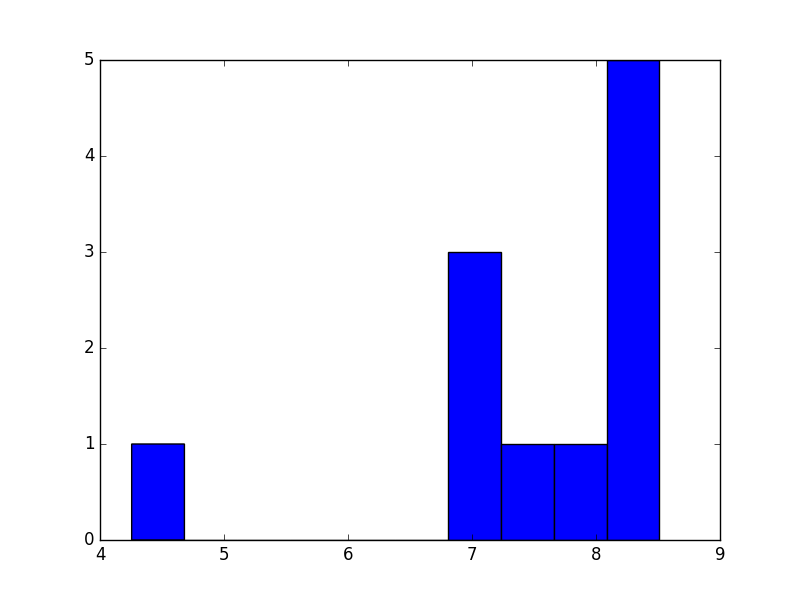

In [59]:
import matplotlib.pyplot as plt

# # TODO: Uncomment the lines below and replace <FILL IN> with appropriate code
# small_idf_values = <FILL_IN>
# fig = <FILL_IN>
# plt.<FILL_IN>

# YOUR CODE HERE

# raise NotImplementedError()
small_idf_values = [x[1] for x in smallIDFTokens]
fig = plt.figure()
plt.hist(small_idf_values)
display(fig)

In [60]:
from pyspark.sql import Row

# # TODO: Uncomment the lines below and replace <FILL IN> with appropriate code
# idfsToCountRow = idfsSmall.<FILL_IN>
# idfsToCountDF = sqlContext.<FILL_IN>

# Create a DataFrame and visualize using display()
# YOUR CODE HERE
# raise NotImplementedError()
idfsToCountRow = idfsSmall.collect()
idfsToCountDF = sqlContext.createDataFrame(idfsToCountRow, ["token", "IDF"])

display(idfsToCountDF)


token,IDF
aided,400.0
precise,100.0
duplex,400.0
dance,400.0
breath,200.0
themes,133.33333333333334
known,100.0
verses,400.0
battle,100.0
9999,400.0


In [61]:
def tfidf(tokens, idfs):
    """ Compute TF-IDF
    Args:
        tokens (list of str): input list of tokens from tokenize
        idfs (dictionary): record to IDF value
    Returns:
        dictionary: a dictionary of records to TF-IDF values
    """
    
    # # TODO: Uncomment the lines below and replace <FILL IN> with appropriate code
#     tfs = 
#     tfIdfDict = <FILL IN>
#     return tfIdfDict
    
    # YOUR CODE HERE
    
    tfs = tf(tokens)
    tfIdfDict = dict()
    for x in set(tokens):
      tfIdfDict[x] = idfs[x] * tfs[x] 
    return tfIdfDict
    
#     raise NotImplementedError()

recb000hkgj8k = amazonRecToToken.filter(lambda x: x[0] == 'b000hkgj8k').collect()[0][1]

idfsSmallWeights = idfsSmall.collectAsMap()
# print filter(lambda line: line[0] in set(recb000hkgj8k), idfsSmallWeights.items())
rec_b000hkgj8k_weights = tfidf(recb000hkgj8k, idfsSmallWeights)

recb000jz4hqo = amazonRecToToken.filter(lambda x: x[0] == 'b000jz4hqo').collect()[0][1]
rec_b000jz4hqo_weights = tfidf(recb000jz4hqo, idfsSmallWeights)

print('Amazon record "b000hkgj8k" has tokens and weights:\n%s' % rec_b000hkgj8k_weights)
print('Amazon record "b000jz4hqo" has tokens and weights: \n%s' % rec_b000jz4hqo_weights)

Amazon record "b000hkgj8k" has tokens and weights:
{u'autocad': 33.33333333333333, u'autodesk': 8.333333333333332, u'courseware': 66.66666666666666, u'psg': 33.33333333333333, u'2007': 3.5087719298245617, u'customizing': 16.666666666666664, u'interface': 3.0303030303030303}
Amazon record "b000jz4hqo" has tokens and weights: 
{u'rom': 1.8518518518518519, u'clickart': 22.22222222222222, u'950': 44.44444444444444, u'image': 4.040404040404041, u'premier': 11.11111111111111, u'000': 4.444444444444445, u'dvd': 1.7777777777777777, u'broderbund': 22.22222222222222, u'pack': 3.4188034188034186}

In [62]:
"""Check for the TFIDF score vector associated with Record recb000jz4hqo"""
assert_equal(rec_b000hkgj8k_weights, 
                   {'autocad': 33.33333333333333, 'autodesk': 8.333333333333332,
                    'courseware': 66.66666666666666, 'psg': 33.33333333333333,
                    '2007': 3.5087719298245617, 'customizing': 16.666666666666664,
                    'interface': 3.0303030303030303})


In [63]:
import math

def dotprod(a, b):
    # # TODO: Replace <FILL IN> with appropriate code
    # return <FILL IN>
    
    # YOUR CODE HERE
    total = 0
    key = list(set(a.keys() + b.keys()))
    for x in key:
      if x not in a or x not in b:
        continue
      total += a[x] * b[x]
    return total
    
      
#     raise NotImplementedError()

def norm(a):
    # # TODO: Replace <FILL IN> with appropriate code
    # return <FILL IN>
    
    # YOUR CODE HERE
    total = 0
    for v in a.values():
      total += v * v
    return math.sqrt(total)
      
#     raise NotImplementedError()

def cossim(a, b):
    # # TODO: Replace <FILL IN> with appropriate code
    # return <FILL IN>
    
    # YOUR CODE HERE
    dotValue = dotprod(a, b)
    normValue = norm(a) * norm(b)
    return dotValue / normValue

#     raise NotImplementedError()

testVec1 = {'foo': 2, 'bar': 3, 'baz': 5 }
testVec2 = {'foo': 1, 'bar': 0, 'baz': 20 }

dp = dotprod(testVec1, testVec2)
nm = norm(testVec1)
cs = cossim(testVec1, testVec2)
print(dp, nm, cs)

(102, 6.164414002968976, 0.8262970212292282)

In [64]:
"""Check that the dot product between testVec1 and testVec2 is 102"""
assert_equal(dp, 102)
"""Check that the L2 norm of testVec1 is around 6.16441400297"""
assert_true(abs(nm - 6.16441400297) < 0.0000001)
"""Check that the cosine similarity between testVec1 and testVec2 is around 0.826297021229"""
assert_true(abs(cs - 0.826297021229) < 0.0000001)

In [65]:
from collections import OrderedDict
def cosineSimilarity(string1, string2, idfsDictionary):
    """ Compute cosine similarity between two strings
    Args:
        string1 (str): first string
        string2 (str): second string
        idfsDictionary (dictionary): a dictionary of IDF values
    Returns:
        cossim: cosine similarity value
    """
    # # TODO: Replace <FILL IN> with appropriate code
    # w1 = tfidf(<FILL IN>)
    # w2 = tfidf(<FILL IN>)
    
    # YOUR CODE HERE

#     str1 = tokenize(string1)
#     str2 = tokenize(string2)
#     strsum = set(str1 + str2)

    
#     w1Origin = map(lambda x: (x, idfsDictionary[x]), str1)
#     w1Extend = [(x, 0) for x in strsum if x not in str1]
#     w1 = dict(w1Origin + w1Extend)
#     print w1
    
#     w2Origin = map(lambda x: (x, idfsDictionary[x]), str2)
#     w2Extend = [(x, 0) for x in strsum if x not in str2]
#     w2 = dict(w2Origin + w2Extend)
#     print w2
    
    w1 = tfidf(tokenize(string1), idfsDictionary)
    w2 = tfidf(tokenize(string2), idfsDictionary)
    print w1
    print w2

    return cossim(w1, w2)


cossimAdobe = cosineSimilarity('Adobe Photoshop',
                               'Adobe Illustrator',
                               idfsSmallWeights)


print(cossimAdobe)


{'photoshop': 22.22222222222222, 'adobe': 8.333333333333334}
{'adobe': 8.333333333333334, 'illustrator': 50.0}
0.0577243382163

In [66]:
"""Check that the cosine similarity between Adobe Photoshop and Adobe Illustrator is around 0.0577243382163"""
assert_true(abs(cossimAdobe - 0.0577243382163) < 0.0000001)

In [67]:
# # TODO: Replace <FILL IN> with appropriate code

crossSmall = (googleSmall.cartesian(amazonSmall).cache())

# print crossSmall.count()
# YOUR CODE HERE
# raise NotImplementedError()

def computeSimilarity(record):
    """ Compute similarity on a combination record
    Args:
        record: a pair, (google record, amazon record)
    Returns:
        pair: a pair, (google URL, amazon ID, cosine similarity value)
    """
    googleRec = record[0]
    amazonRec = record[1]
    
    
    # # TODO: Replace <FILL IN> with appropriate code
    googleURL = googleRec[0]
    amazonID = amazonRec[0]
    googleValue = googleRec[1]
    amazonValue = amazonRec[1]
    cs = cosineSimilarity(googleValue, amazonValue, idfsSmallWeights)
    
    # YOUR CODE HERE
#     raise NotImplementedError()
    return (googleURL, amazonID, cs)
  
# TODO: Replace <FILL IN> with appropriate code


similarities = (crossSmall.map(lambda line: computeSimilarity(line)).cache())
# print similarities.filter(lambda record: (record[0] == 'http://www.google.com/base/feeds/snippets/17242822440574356561')).collect()


# YOUR CODE HERE
# raise NotImplementedError()

def similar(amazonID, googleURL):
    """ Return similarity value
    Args:
        amazonID: amazon ID
        googleURL: google URL
    Returns:
        similar: cosine similarity value
    """
    return (similarities
            .filter(lambda record: (record[0] == googleURL and record[1] == amazonID))
            .collect()[0][2])

similarityAmazonGoogle = similar('b000o24l3q', 'http://www.google.com/base/feeds/snippets/17242822440574356561')

print('Requested similarity is %s.' % similarityAmazonGoogle)

Requested similarity is 0.000303171940451.

In [68]:
"""Check that the cosine similarity between the Amazon record and the Google record is around 0.000303171940451"""
assert_true(abs(similarityAmazonGoogle - 0.000303171940451) < 0.0000001)

In [69]:
# # TODO: Replace <FILL IN> with appropriate code
# def computeSimilarityBroadcast(record):
#     """ Compute similarity on a combination record, using Broadcast variable
#     Args:
#         record: a pair, (google record, amazon record)
#     Returns:
#         pair: a pair, (google URL, amazon ID, cosine similarity value)
#     """
#     googleRec = record[0]
#     amazonRec = record[1]
#     googleURL = <FILL IN>
#     amazonID = <FILL IN>
#     googleValue = <FILL IN>
#     amazonValue = <FILL IN>
#     cs = cosineSimilarity(<FILL IN>, idfsSmallBroadcast.value)
#     return (googleURL, amazonID, cs)

def computeSimilarityBroadcast(record):
    """ Compute similarity on a combination record, using Broadcast variable
    Args:
        record: a pair, (google record, amazon record)
    Returns:
        pair: a pair, (google URL, amazon ID, cosine similarity value)
    """
    googleRec = record[0]
    amazonRec = record[1]
    googleURL = googleRec[0]
    amazonID = amazonRec[0]
    googleValue = googleRec[1]
    amazonValue = amazonRec[1]
    cs = cosineSimilarity(googleValue, amazonValue, idfsSmallBroadcast.value)
    # YOUR CODE HERE
    
    return (googleURL, amazonID, cs)

    
idfsSmallBroadcast = sc.broadcast(idfsSmallWeights)

similaritiesBroadcast = (crossSmall.map(lambda line: computeSimilarityBroadcast(line)).cache())

# YOUR CODE HERE
# raise NotImplementedError()

def similarBroadcast(amazonID, googleURL):
    """ Return similarity value, computed using Broadcast variable
    Args:
        amazonID: amazon ID
        googleURL: google URL
    Returns:
        similar: cosine similarity value
    """
    return (similaritiesBroadcast
            .filter(lambda record: (record[0] == googleURL and record[1] == amazonID))
            .collect()[0][2])

similarityAmazonGoogleBroadcast = similarBroadcast('b000o24l3q', 'http://www.google.com/base/feeds/snippets/17242822440574356561')
print('Requested similarity is %s.' % similarityAmazonGoogleBroadcast)

Requested similarity is 0.000303171940451.

In [70]:
from pyspark import Broadcast
"""Check that idfsSmallBroadcast is a boradcast variable"""
assert_true(isinstance(idfsSmallBroadcast, Broadcast))
"""Check that the number of weights/tokens is 4772"""
assert_equal(len(idfsSmallBroadcast.value), 4772)
"""Check that the cosine similarity between the Amazon record and the Google record is around 0.000303171940451"""
assert_true(abs(similarityAmazonGoogleBroadcast - 0.000303171940451) < 0.0000001)

In [71]:
GOLDFILE_PATTERN = '^(.+),(.+)'

# Parse each line of a data file useing the specified regular expression pattern
def parse_goldfile_line(goldfile_line):
    """ Parse a line from the 'golden standard' data file
    Args:
        goldfile_line: a line of data
    Returns:
        pair: ((key, 'gold', 1 if successful or else 0))
    """
    match = re.search(GOLDFILE_PATTERN, goldfile_line)
    if match is None:
        print('Invalid goldfile line: %s' % goldfile_line)
        return (goldfile_line, -1)
    elif match.group(1) == '"idAmazon"':
        print('Header datafile line: %s' % goldfile_line)
        return (goldfile_line, 0)
    else:
        key = '%s %s' % (removeQuotes(match.group(1)), removeQuotes(match.group(2)))
        return ((key, 'gold'), 1)
    
GOAL_STANDARD = "https://raw.githubusercontent.com/10605/data/master/hw1/" + GOLD_STANDARD_PATH
sc.addFile(GOAL_STANDARD)

gsRaw = (sc
         .textFile("file://" + SparkFiles.get(GOLD_STANDARD_PATH))
         .map(parse_goldfile_line)
         .cache())

gsFailed = (gsRaw
            .filter(lambda s: s[1] == -1)
            .map(lambda s: s[0]))
for line in gsFailed.take(10):
    print('Invalid goldfile line: %s' % line)

goldStandard = (gsRaw
                .filter(lambda s: s[1] == 1)
                .map(lambda s: s[0])
                .cache())

print('Read %d lines, successfully parsed %d lines, failed to parse %d lines' % (gsRaw.count(),
                                                                                 goldStandard.count(),
                                                                                 gsFailed.count()))
assert (gsFailed.count() == 0)
assert (gsRaw.count() == (goldStandard.count() + 1))

# print gsRaw.take(3)
# print goldStandard.take(3)
# print gsRaw.count() - 1

Read 1301 lines, successfully parsed 1300 lines, failed to parse 0 lines

In [72]:
# # TODO: Replace <FILL IN> with appropriate code
sims = similaritiesBroadcast.map(lambda record: (record[1] + " " + record[0], record[2])).cache()
# print sims.take(3)

trueDupsRDD = sims.join(goldStandard).map(lambda line: (line[0], line[1][0])).cache()
# print trueDupsRDD.take(5)

trueDupsCount = trueDupsRDD.count()

avgSimDups = sum(trueDupsRDD.values().collect()) / trueDupsCount

nonDupsRDD = (sims
              .subtract(trueDupsRDD).cache())
avgSimNon = sum(nonDupsRDD.values().collect()) / nonDupsRDD.count()
 
# YOUR CODE HERE
# raise NotImplementedError()

print('There are %s true duplicates.' % trueDupsCount)
print('The average similarity of true duplicates is %s.' % avgSimDups)
print('And for non duplicates, it is %s.' % avgSimNon)

There are 146 true duplicates.
The average similarity of true duplicates is 0.264332573435.
And for non duplicates, it is 0.00123476304656.

In [73]:
"""Check that there are 146 true duplicate pairs in the dataset"""
assert_equal(trueDupsCount, 146)


In [74]:
# # TODO: Replace <FILL IN> with appropriate code
amazonFullRecToToken = amazon.map(lambda line: (line[0], tokenize(line[1]))).cache()
googleFullRecToToken = google.map(lambda line: (line[0], tokenize(line[1]))).cache()

print amazonFullRecToToken.take(3)
print googleFullRecToToken.take(3)

# YOUR CODE HERE
# raise NotImplementedError()
print('Amazon full dataset is %s products, Google full dataset is %s products' % (amazonFullRecToToken.count(),
                                                                                  googleFullRecToToken.count()))

[(u'b000jz4hqo', [u'clickart', u'950', u'000', u'premier', u'image', u'pack', u'dvd', u'rom', u'broderbund']), (u'b0006zf55o', [u'ca', u'international', u'arcserve', u'lap', u'desktop', u'oem', u'30pk', u'oem', u'arcserve', u'backup', u'v11', u'1', u'win', u'30u', u'laptops', u'desktops', u'computer', u'associates']), (u'b00004tkvy', [u'noah', u'ark', u'activity', u'center', u'jewel', u'case', u'ages', u'3', u'8', u'victory', u'multimedia'])]
[(u'http://www.google.com/base/feeds/snippets/11125907881740407428', [u'learning', u'quickbooks', u'2007', u'learning', u'quickbooks', u'2007', u'intuit']), (u'http://www.google.com/base/feeds/snippets/11538923464407758599', [u'superstart', u'fun', u'reading', u'writing', u'fun', u'reading', u'writing', u'designed', u'help', u'kids', u'learn', u'read', u'write', u'better', u'exercises', u'puzzle', u'solving', u'creative', u'writing', u'decoding']), (u'http://www.google.com/base/feeds/snippets/11343515411965421256', [u'qb', u'pos', u'6', u'0', u'basic', u'software', u'qb', u'pos', u'6', u'0', u'basic', u'retail', u'mngmt', u'software', u'retailers', u'need', u'basic', u'inventory', u'sales', u'customer', u'tracking', u'intuit'])]
Amazon full dataset is 1363 products, Google full dataset is 3226 products

In [75]:
"""Check that Amazon full dataset has 1363 products"""
assert_equal(amazonFullRecToToken.count(), 1363)


In [76]:
# # TODO: Replace <FILL IN> with appropriate code
# fullCorpusRDD = amazonFullRecToToken
# idfsFull = idfs(fullCorpusRDD)
# idfsFullCount = idfsFull.count()
# print 'There are %s unique tokens in the full datasets.' % idfsFullCount
# 
# # Convert to dict and then broadcast
# idfsFullWeights = <FILL IN>
# idfsFullBroadcast = <FILL IN>
# 
# # Pre-compute TF-IDF weights.  Build mappings from record ID weight vector.
# amazonWeightsRDD = <FILL IN>
# googleWeightsRDD = <FILL IN>

# YOUR CODE HERE
# raise NotImplementedError()
fullCorpusRDD = amazonFullRecToToken.union(googleFullRecToToken).cache()
idfsFull = idfs(fullCorpusRDD)
idfsFullCount = idfsFull.count()
print('There are %s unique tokens in the full datasets.' % idfsFullCount)

# Convert to dict and then broadcast
# YOUR CODE HERE
# raise NotImplementedError()
idfBroadCast = sc.broadcast(idfsFull.collect())

# Pre-compute TF-IDF weights.  Build mappings from record ID weight vector.
# YOUR CODE HERE
# raise NotImplementedError()

amazonWeightsRDD = amazonFullRecToToken.map(lambda line: (line[0], tfidf(line[1], dict(idfBroadCast.value)))).cache()

# print tt.map(lambda line: (line[0], tfidf(line[1], idfBroadCast.value))).cache()
# print amazonWeightsRDD.take(5)
googleWeightsRDD = googleFullRecToToken.map(lambda line: (line[0], tfidf(line[1], dict(idfBroadCast.value)))).cache()
print('There are %s Amazon weights and %s Google weights.' % (amazonWeightsRDD.count(),
                                                              googleWeightsRDD.count()))
print amazonWeightsRDD.take(3)
print googleWeightsRDD.take(3)

There are 17078 unique tokens in the full datasets.
There are 1363 Amazon weights and 3226 Google weights.
[(u'b000jz4hqo', {u'rom': 2.4051362683438153, u'clickart': 56.65432098765432, u'950': 254.94444444444443, u'image': 3.6948470209339774, u'premier': 9.27070707070707, u'000': 6.218157181571815, u'dvd': 1.287598204264871, u'broderbund': 22.169082125603865, u'pack': 2.98180636777128}), (u'b0006zf55o', {u'1': 0.3231235037318687, u'desktops': 12.74722222222222, u'win': 0.501859142607174, u'ca': 9.10515873015873, u'v11': 50.98888888888888, u'associates': 7.284126984126985, u'30u': 84.98148148148148, u'30pk': 254.94444444444443, u'desktop': 2.23635477582846, u'laptops': 11.588383838383837, u'arcserve': 24.28042328042328, u'computer': 0.6965695203400122, u'lap': 127.47222222222221, u'oem': 46.35353535353535, u'international': 9.44238683127572, u'backup': 2.8015873015873014}), (u'b00004tkvy', {u'case': 5.28078250863061, u'center': 6.953030303030303, u'noah': 208.5909090909091, u'ages': 7.871355060034306, u'multimedia': 7.070878274268105, u'jewel': 7.192789968652038, u'3': 0.6964638033085445, u'victory': 34.765151515151516, u'activity': 10.175166297117517, u'8': 1.2641873278236915, u'ark': 208.5909090909091})]
[(u'http://www.google.com/base/feeds/snippets/11125907881740407428', {u'quickbooks': 17.48190476190476, u'2007': 4.985334057577403, u'learning': 5.932773109243698, u'intuit': 13.379008746355684}), (u'http://www.google.com/base/feeds/snippets/11538923464407758599', {u'write': 3.8241666666666667, u'kids': 2.6073863636363637, u'help': 0.71703125, u'reading': 6.286301369863014, u'read': 6.373611111111112, u'puzzle': 4.98804347826087, u'solving': 9.97608695652174, u'decoding': 114.72500000000001, u'better': 1.5195364238410596, u'fun': 2.2495098039215686, u'designed': 0.8466789667896679, u'learn': 1.1950520833333333, u'exercises': 4.881914893617022, u'superstart': 57.362500000000004, u'writing': 9.695070422535212, u'creative': 1.130295566502463}), (u'http://www.google.com/base/feeds/snippets/11343515411965421256', {u'customer': 4.011363636363637, u'tracking': 3.7248376623376624, u'basic': 5.959740259740259, u'sales': 6.728739002932551, u'pos': 41.71818181818182, u'0': 0.7094928880643167, u'qb': 59.5974025974026, u'inventory': 6.320936639118457, u'retailers': 41.71818181818182, u'6': 1.4952753339850113, u'need': 0.6245236799129015, u'mngmt': 104.29545454545455, u'retail': 5.214772727272727, u'intuit': 4.2569573283859, u'software': 0.2247746865203762})]

In [77]:
"""Check that there are 17078 unique tokens in the full dataset"""
assert_equal(idfsFullCount, 17078)
"""Check that Amazon full dataset has 1363 products/weights"""
assert_equal(amazonWeightsRDD.count(), 1363)


In [78]:
# # TODO: Replace <FILL IN> with appropriate code
# amazonNorms = amazonWeightsRDD.<FILL IN>
# amazonNormsBroadcast = <FILL IN>
# googleNorms = googleWeightsRDD.<FILL IN>
# googleNormsBroadcast = <FILL IN>

# YOUR CODE HERE
amazonNorms = amazonWeightsRDD.map(lambda line: (line[0], norm(line[1]))).collect()
amazonNormsBroadcast = sc.broadcast(amazonNorms)
googleNorms = googleWeightsRDD.map(lambda line: (line[0], norm(line[1]))).collect()
googleNormsBroadcast = sc.broadcast(googleNorms)
# print amazonNormsBroadcast.value[:5]
# raise NotImplementedError()
print('There are %s Amazon norms and %s Google norms.' % (len(amazonNorms), len(googleNorms)))

There are 1363 Amazon norms and 3226 Google norms.

In [79]:
"""Check that amazonNormsBroadcast is a boradcast variable"""
assert_true(isinstance(amazonNormsBroadcast, Broadcast))
"""Check that Amazon full dataset has 1363 products/norms"""
assert_equal(len(amazonNormsBroadcast.value), 1363)


In [80]:
# # TODO: Replace <FILL IN> with appropriate code
def invert(record):
    """ Invert (ID, tokens) to a list of (token, ID)
    Args:
        record: a pair, (ID, token vector)
    Returns:
        pairs: a list of pairs of token to ID
    """
#     <FILL IN>
    ID = record[0]
    tokens = list(record[1].keys())
    pairs = map(lambda token: (token, ID), tokens)
    return (pairs)

amazonInvPairsRDD = (amazonWeightsRDD
                    .flatMap(lambda line: invert(line))
                    .cache())

googleInvPairsRDD = (googleWeightsRDD
                    .flatMap(lambda line: invert(line))
                    .cache())

print amazonWeightsRDD.take(1)
print googleWeightsRDD.take(1)
# YOUR CODE HERE
# raise NotImplementedError()
print('There are %s Amazon inverted pairs and %s Google inverted pairs.' % (amazonInvPairsRDD.count(),
                                                                            googleInvPairsRDD.count()))
print amazonInvPairsRDD.take(3)
print googleInvPairsRDD.take(3)
# print amazonInvPairsRDD.groupByKey().mapValues(list).count()

[(u'b000jz4hqo', {u'rom': 2.4051362683438153, u'clickart': 56.65432098765432, u'950': 254.94444444444443, u'image': 3.6948470209339774, u'premier': 9.27070707070707, u'000': 6.218157181571815, u'dvd': 1.287598204264871, u'broderbund': 22.169082125603865, u'pack': 2.98180636777128})]
[(u'http://www.google.com/base/feeds/snippets/11125907881740407428', {u'quickbooks': 17.48190476190476, u'2007': 4.985334057577403, u'learning': 5.932773109243698, u'intuit': 13.379008746355684})]
There are 111387 Amazon inverted pairs and 77678 Google inverted pairs.
[(u'rom', u'b000jz4hqo'), (u'clickart', u'b000jz4hqo'), (u'950', u'b000jz4hqo')]
[(u'quickbooks', u'http://www.google.com/base/feeds/snippets/11125907881740407428'), (u'2007', u'http://www.google.com/base/feeds/snippets/11125907881740407428'), (u'learning', u'http://www.google.com/base/feeds/snippets/11125907881740407428')]
12443

In [81]:
invertedPair = invert((1, {'foo': 2}))
"""Check that the function successfully inverts (ID, tokens) to a list of (tokens, ID)"""
assert_equal(invertedPair[0][1], 1)
"""Check that there are 111387 Amazon inverted pairs"""
assert_equal(amazonInvPairsRDD.count(), 111387)


In [82]:
# # TODO: Replace <FILL IN> with appropriate code
def swap(record):
    """ Swap (token, (ID, URL)) to ((ID, URL), token)
    Args:
        record: a pair, (token, (ID, URL))
    Returns:
        pair: ((ID, URL), token)
    """
    token = record[0]
    keys = record[1]
    return (keys, token)
# 
commonTokens = (amazonInvPairsRDD
                .join(googleInvPairsRDD).map(lambda line: swap(line)).groupByKey()
                .cache())
# print amazonInvPairsRDD.fullOuterJoin(googleInvPairsRDD).take(5)
# print amazonInvPairsRDD.join(googleInvPairsRDD).take(5)
# print amazonInvPairsRDD.join(googleInvPairsRDD).count()
# print amazonInvPairsRDD.join(googleInvPairsRDD).groupBy(lambda line: line[1]).count()

# YOUR CODE HERE
# raise NotImplementedError()
print commonTokens.take(5)

print('Found %d common tokens' % commonTokens.count())

[((u'b00005lzly', u'http://www.google.com/base/feeds/snippets/18376072611700638452'), <pyspark.resultiterable.ResultIterable object at 0x7febb6bff9d0>), ((u'b000bnb72g', u'http://www.google.com/base/feeds/snippets/6959766318020460134'), <pyspark.resultiterable.ResultIterable object at 0x7febb6bff4d0>), ((u'b000bcicxy', u'http://www.google.com/base/feeds/snippets/18320700833356403146'), <pyspark.resultiterable.ResultIterable object at 0x7febb6bfffd0>), ((u'b00004ochi', u'http://www.google.com/base/feeds/snippets/7147648211015076337'), <pyspark.resultiterable.ResultIterable object at 0x7febb6bff350>), ((u'b000e8jlda', u'http://www.google.com/base/feeds/snippets/13494528319434009653'), <pyspark.resultiterable.ResultIterable object at 0x7febb6bff490>)]
Found 2441100 common tokens

In [83]:
"""Check that there are 2441100 common tokens"""
assert_equal(commonTokens.count(), 2441100)

In [84]:
# # TODO: Replace <FILL IN> with appropriate code
# print amazonWeightsRDD.take(1)
# print googleWeightsRDD.take(1)
amazonWeightsBroadcast = sc.broadcast(amazonWeightsRDD.collect())
googleWeightsBroadcast = sc.broadcast(googleWeightsRDD.collect())
# print filter(lambda line: 'b00005lzly' in line, amazonWeightsBroadcast.value)[0][1]
# print dict(amazonWeightsBroadcast.value)['b00005lzly']
# print dict(amazonNormsBroadcast.value)['b00005lzly']
# 
def fastCosineSimilarity(record):
    """ Compute Cosine Similarity using Broadcast variables
    Args:
        record: ((ID, URL), iterable(token))
    Returns:
        pair: ((ID, URL), cosine similarity value)
    """
    amazonRec = record[0][0]
    googleRec = record[0][1]
    tokens = list(record[1])
    amazonTokenWeight = dict(amazonWeightsBroadcast.value)[amazonRec]
    googleTokenWeight = dict(googleWeightsBroadcast.value)[googleRec]
    amazonTokenNorm = dict(amazonNormsBroadcast.value)[amazonRec]
    googleTokenNorm = dict(googleNormsBroadcast.value)[googleRec]
    weightSum = 0
    for token in tokens:
      weightSum += amazonTokenWeight[token] * googleTokenWeight[token]
      
#     s = 
    value = weightSum / amazonTokenNorm / googleTokenNorm
    key = (amazonRec, googleRec)
    return (key, value)

similaritiesFullRDD = (commonTokens
                       .map(lambda line: fastCosineSimilarity(line))
                       .cache())

# YOUR CODE HERE
# raise NotImplementedError()
print similaritiesFullRDD.take(5)
print(similaritiesFullRDD.count())

[((u'b00005lzly', u'http://www.google.com/base/feeds/snippets/18376072611700638452'), 0.004328984263097416), ((u'b000bnb72g', u'http://www.google.com/base/feeds/snippets/6959766318020460134'), 4.899370575288749e-07), ((u'b000bcicxy', u'http://www.google.com/base/feeds/snippets/18320700833356403146'), 1.3669848021029356e-06), ((u'b00004ochi', u'http://www.google.com/base/feeds/snippets/7147648211015076337'), 2.213533553905849e-05), ((u'b000e8jlda', u'http://www.google.com/base/feeds/snippets/13494528319434009653'), 1.5067231549585961e-06)]
2441100

In [85]:
similarityTest = similaritiesFullRDD.filter(lambda kv : kv[0][0] == 'b00005lzly' and kv[0][1] == 'http://www.google.com/base/feeds/snippets/13823221823254120257').collect()
"""Check that we are testing the similarity score of one pair of product"""
assert_equal(len(similarityTest), 1)
"""Check that the similarity socre is very small (they are the same entity)"""
# print similarityTest[0][1]
assert_true(abs(similarityTest[0][1] - 4.286548414e-06) < 0.000000000001)
"""Check that there are 2441100 common tokens"""
assert_equal(similaritiesFullRDD.count(), 2441100)

In [86]:
# Create an RDD of ((Amazon ID, Google URL), similarity score)
simsFullRDD = similaritiesFullRDD.map(lambda x: ("%s %s" % (x[0][0], x[0][1]), x[1]))
assert (simsFullRDD.count() == 2441100)

# Create an RDD of just the similarity scores
simsFullValuesRDD = (simsFullRDD
                     .map(lambda x: x[1])
                     .cache())
assert (simsFullValuesRDD.count() == 2441100)

# Look up all similarity scores for true duplicates

# This helper function will return the similarity score for records that are in the gold standard and the simsFullRDD (True positives), and will return 0 for records that are in the gold standard but not in simsFullRDD (False Negatives).
def gs_value(record):
    if (record[1][1] is None):
        return 0
    else:
        return record[1][1]

# Join the gold standard and simsFullRDD, and then extract the similarities scores using the helper function
trueDupSimsRDD = (goldStandard
                  .leftOuterJoin(simsFullRDD)
                  .map(gs_value)
                  .cache())
print('There are %s true duplicates.' % trueDupSimsRDD.count())
assert(trueDupSimsRDD.count() == 1300)
print trueDupSimsRDD.take(5)

There are 1300 true duplicates.
[0.18511950730014692, 0.039989106095319686, 0.5656445118913457, 0.1409873316933027, 0.031203618585653552]

In [87]:
from pyspark.accumulators import AccumulatorParam
class VectorAccumulatorParam(AccumulatorParam):
    # Initialize the VectorAccumulator to 0
    def zero(self, value):
        return [0] * len(value)

    # Add two VectorAccumulator variables
    def addInPlace(self, val1, val2):
        for i in range(len(val1)):
            val1[i] += val2[i]
        return val1

# Return a list with entry x set to value and all other entries set to 0
def set_bit(x, value, length):
    bits = []
    for y in range(length):
        if (x == y):
            bits.append(value)
        else:
            bits.append(0)
    return bits

# Pre-bin counts of false positives for different threshold ranges
BINS = 101
nthresholds = 100
def bin(similarity):
    return int(similarity * nthresholds)

# fpCounts[i] = number of entries (possible false positives) where bin(similarity) == i
zeros = [0] * BINS
fpCounts = sc.accumulator(zeros, VectorAccumulatorParam())

def add_element(score):
    global fpCounts
    b = bin(score)
    fpCounts += set_bit(b, 1, BINS)

simsFullValuesRDD.foreach(add_element)

# Remove true positives from FP counts
def sub_element(score):
    global fpCounts
    b = bin(score)
    fpCounts += set_bit(b, -1, BINS)

trueDupSimsRDD.foreach(sub_element)

def falsepos(threshold):
    fpList = fpCounts.value
    return sum([fpList[b] for b in range(0, BINS) if float(b) / nthresholds >= threshold])

def falseneg(threshold):
    return trueDupSimsRDD.filter(lambda x: x < threshold).count()

def truepos(threshold):
    return trueDupSimsRDD.count() - falsenegDict[threshold]

In [88]:
# Precision = true-positives / (true-positives + false-positives)
# Recall = true-positives / (true-positives + false-negatives)
# F-measure = 2 x Recall x Precision / (Recall + Precision)

def precision(threshold):
    tp = trueposDict[threshold]
    return float(tp) / (tp + falseposDict[threshold])

def recall(threshold):
    tp = trueposDict[threshold]
    return float(tp) / (tp + falsenegDict[threshold])

def fmeasure(threshold):
    r = recall(threshold)
    p = precision(threshold)
    return 2 * r * p / (r + p)

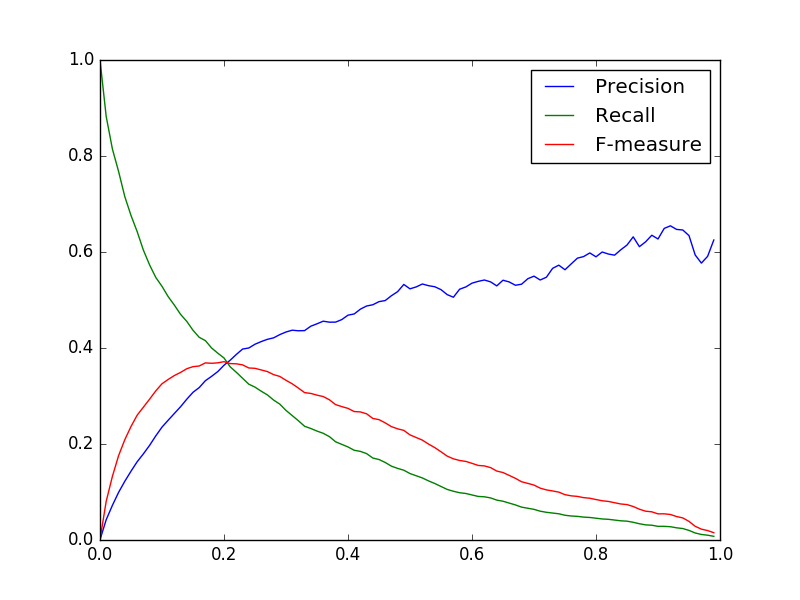

In [89]:
thresholds = [float(n) / nthresholds for n in range(0, nthresholds)]
falseposDict = dict([(t, falsepos(t)) for t in thresholds])
falsenegDict = dict([(t, falseneg(t)) for t in thresholds])
trueposDict = dict([(t, truepos(t)) for t in thresholds])

precisions = [precision(t) for t in thresholds]
recalls = [recall(t) for t in thresholds]
fmeasures = [fmeasure(t) for t in thresholds]

print(precisions[0], fmeasures[0])
assert (abs(precisions[0] - 0.000532546802671) < 0.0000001)
assert (abs(fmeasures[0] - 0.00106452669505) < 0.0000001)


fig = plt.figure()
plt.plot(thresholds, precisions)
plt.plot(thresholds, recalls)
plt.plot(thresholds, fmeasures)
plt.legend(['Precision', 'Recall', 'F-measure'])
display(fig)

In [90]:
# Create a DataFrame and visualize using display()
graph = [(t, precision(t), recall(t),fmeasure(t)) for t in thresholds]
graphRDD = sc.parallelize(graph)

graphRow = graphRDD.map(lambda kv: Row(threshold=kv[0], precision=kv[1], recall=kv[2], fmeasure=kv[3]))
graphDF = sqlContext.createDataFrame(graphRow)
display(graphDF)

fmeasure,precision,recall,threshold
0.0010645266950540452,5.325468026709271E-4,1.0,0.0
0.08061002178649238,0.04223433242506812,0.8823076923076923,0.01
0.1325489705238125,0.0721438790108318,0.8146153846153846,0.02
0.17584353801427186,0.09929360262660432,0.7676923076923077,0.03
0.2089183421318657,0.12232013678810996,0.7153846153846154,0.04
0.23648103309120258,0.14329964134333226,0.6761538461538461,0.05
0.2601651347561926,0.1631177964446181,0.6423076923076924,0.06
0.2767495152476644,0.17951063343242626,0.6038461538461538,0.07
0.2934226073257188,0.19719428268925357,0.573076923076923,0.08
0.3106838540528731,0.21696673787000306,0.546923076923077,0.09
